In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([[80, 60, 50],  
    [150, 100, 100],
    [135, 100, 80],
    [165, 120, 100],
    [95, 70, 60],
    [130, 90, 80],
    [110, 80, 70]])
dataset = pd.DataFrame({'B':data[0,:],'C':data[1,:],'D':data[2,:],'E':data[3,:],'F':data[4,:],'G':data[5,:],'H':data[6,:]})
dataset.rename(index={0:'Q',1:'L',2:'K'}, inplace=True)
print(dataset)
print(dataset.T)

    B    C    D    E   F    G    H
Q  80  150  135  165  95  130  110
L  60  100  100  120  70   90   80
K  50  100   80  100  60   80   70
     Q    L    K
B   80   60   50
C  150  100  100
D  135  100   80
E  165  120  100
F   95   70   60
G  130   90   80
H  110   80   70


In [3]:
desc_mean = dataset.T.mean()
desc_var = dataset.T.var()
desc_std = dataset.T.std()
desc_median = dataset.T.median()

print('Question 2','\n','a/','\n','Mean of Q,L,K are: ')
print(desc_mean)

print('\n','Variance of Q,L,K are: ')
print(desc_var)

print('\n','Standard deviation of Q,L,K are: ')
print(desc_std)

print('\n','Medians of Q,L,K are:')
print(desc_median)

Question 2 
 a/ 
 Mean of Q,L,K are: 
Q    123.571429
L     88.571429
K     77.142857
dtype: float64

 Variance of Q,L,K are: 
Q    914.285714
L    414.285714
K    357.142857
dtype: float64

 Standard deviation of Q,L,K are: 
Q    30.237158
L    20.354010
K    18.898224
dtype: float64

 Medians of Q,L,K are:
Q    130.0
L     90.0
K     80.0
dtype: float64


In [4]:
desc_var = desc_std**2

In [5]:
import matplotlib.pyplot as plt
print('Question 2','\n','b.1/','\n','Plot Histogram of Q: ')
plt.hist(dataset.T['Q'],bins='auto')
plt.title('Histogram of Q')
plt.ylabel('Freq')
plt.xlabel('Output')

Question 2 
 b.1/ 
 Plot Histogram of Q: 


Text(0.5, 0, 'Output')

Question 2 
 b.2/ 
 Plot Histogram of L: 


Text(0.5, 0, 'Labour')

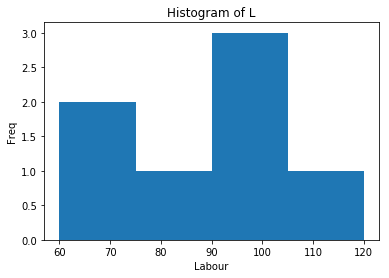

In [6]:
print('Question 2','\n','b.2/','\n','Plot Histogram of L: ')
plt.hist(dataset.T['L'],bins='auto')
plt.title('Histogram of L')
plt.ylabel('Freq')
plt.xlabel('Labour')

In [7]:
from sklearn.linear_model import LinearRegression as lrg

print('Question 2','\n','c/','\n','Model is: Q=A*(L**alpha)*(K**beta)')
print('\n','log transfrom of model => log(Q)= log(A)+alpha*log(L)+beta*log(K)')

dataset_log = np.log(dataset.T)

print('Log values are :')
print(dataset_log)



Question 2 
 c/ 
 Model is: Q=A*(L**alpha)*(K**beta)

 log transfrom of model => log(Q)= log(A)+alpha*log(L)+beta*log(K)
Log values are :
          Q         L         K
B  4.382027  4.094345  3.912023
C  5.010635  4.605170  4.605170
D  4.905275  4.605170  4.382027
E  5.105945  4.787492  4.605170
F  4.553877  4.248495  4.094345
G  4.867534  4.499810  4.382027
H  4.700480  4.382027  4.248495


In [8]:
from sklearn import linear_model
import statsmodels.api as sm
X = dataset_log[['L','K']]
Y = dataset_log['Q']
regr = linear_model.LinearRegression()

regr.fit(X, Y)

print('Question 2','\n','d.1/','\n','The Results of Model are:')
print('Intercept: \n', regr.intercept_,'\n')
print('Coefficients: \n', regr.coef_,'\n')

Question 2 
 d.1/ 
 The Results of Model are:
Intercept: 
 0.14623321175616866 

Coefficients: 
 [0.54842747 0.50874094] 



In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_OLS = smf.ols('Q ~ L + K', data=dataset_log).fit()
print('Question 2','\n','d.2/','\n','The Results of Model are:')
print('Another way to fit model it is using statmodels package','\n')
print(model_OLS.summary())

Question 2 
 d.2/ 
 The Results of Model are:
Another way to fit model it is using statmodels package 

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:44:25   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [10]:
test = regr.coef_[0] + regr.coef_[1]
print('Question 2','\n','d.3/')
print('Alpha + Beta: ',test,' is slightly larger than 1','\n','=> Not Constant Return but Increasing returns to scale','\n',' Y increases by more than the proportional change in L and K inputs')


Question 2 
 d.3/
Alpha + Beta:  1.0571684057723618  is slightly larger than 1 
 => Not Constant Return but Increasing returns to scale 
  Y increases by more than the proportional change in L and K inputs


Question 2 
 e/


Text(0, 0.5, 'Residual')

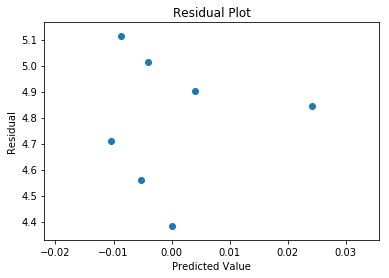

In [11]:
Y_head = regr.predict(X)
Residual = Y - Y_head
print('Question 2','\n','e/')
plt.scatter(Residual,Y_head)
plt.title('Residual Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [12]:
Adj_r2 = 1-(1-regr.score(X,Y))*(len(X.index)-1)/(len(X.index)-len(X.columns)-1)
print('Question 2','\n','f/')
print('Adjusted R squared calculated as: ',Adj_r2)
print('Compare with OLS: ',model_OLS.rsquared_adj)

Question 2 
 f/
Adjusted R squared calculated as:  0.9968763418198051
Compare with OLS:  0.9968763418198051


In [13]:
regr.score(X,Y)

0.9979175612132034